# Using KNN Algorithm to predict if a person will have diabetes or not

## importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [4]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

## Extracting independent variables

In [5]:
X = data.iloc[:,0:8]

## Extracting dependent variable

In [6]:
y = data.iloc[:,8]

## Explorning data to know relation before processing

<AxesSubplot:>

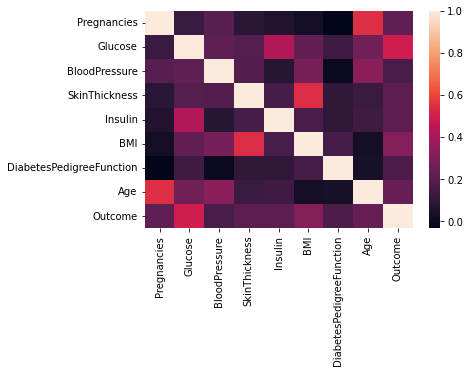

In [7]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Age', ylabel='count'>

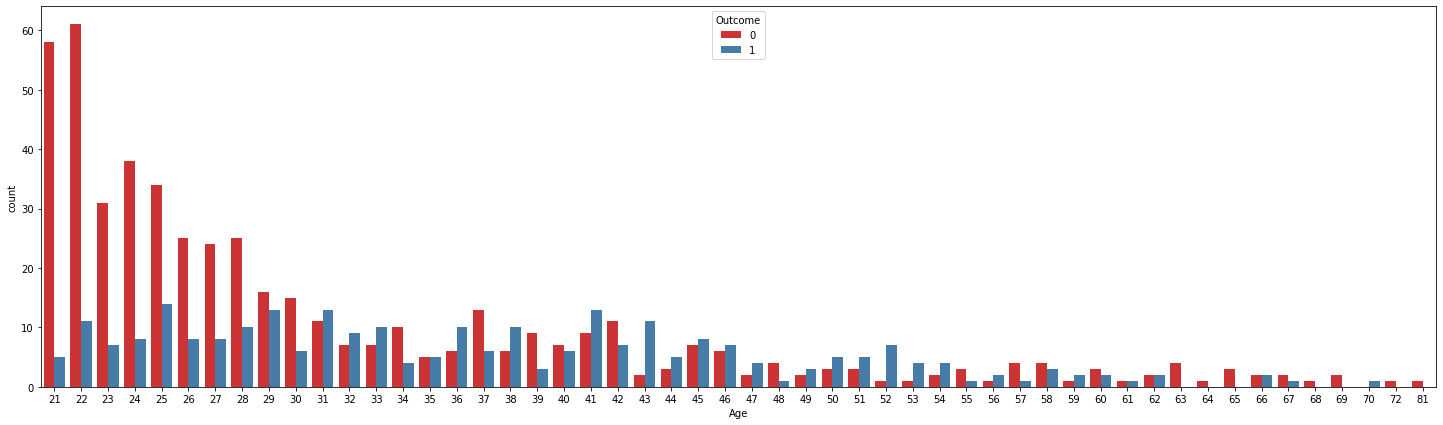

In [8]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

## splitting dataset into training and testing set

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Feature scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Loading model - KNN

In [12]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

## Fitting model

In [13]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

## Making predictions

In [14]:
y_pred = classifier.predict(X_test)

## Evaluating model

In [16]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


## Accuracy

In [18]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182
